In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
#import functions and processing
import functions
import processing
# loading the path to our data from a config-file
datadir = None
try:
    from google.colab import drive
    drive.mount('/content/drive')
    datadir = "cloud"
except Exception as e:
    print(e)
    datadir = "harddrive"
data_path = functions.get_from_config(datadir)
processing.initialize_processing_parameters_from_config()

c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


No module named 'google.colab'
chunksize set to 10000
nrows set to 30000


## Research questions [RQs]
### [RQ1]

### [RQ7] 
Estimating probabilities is a core skill for a data scientist: show us your best!

1. Estimate the probability that a book has over 30% of the ratings above 4.
2. Estimate the probability that an author publishes a new book within two years from its last work.
3. In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
4. Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

#### ad 1.
Estimate the probability that a book has over 30% of the ratings above 4.

After inspecting the .json-file "lighter_authors" we decided to use the attribute "rate_dist".
First we took a look at the format of this attribute and examined its general structure is

'rating_dist': '5:1674064|4:664833|3:231195|2:41699|1:16215|total:2628006'

Just with different numbers, we build our functions to process this information as the following code shows:

In [2]:
books_with_30Percent_of_ratings_above_4, books_with_at_least_one_rating = processing.answer_rq_7_1(data_path)

The process lasted approximately 0.24 seconds.
We have found 251 books with 30 Percent of ratings above 4
We have found 300 books with at least one rating
The share of books with 30Percent of ratings above 4 is approximately:  0.8367
The process lasted approximately 0.24 seconds.


### ad 2.
Estimate the probability that an author publishes a new book within two years from its last work.

In [3]:
results = processing.answer_rq_7_2(data_path)

0.2857 is the probability that an author publishes a book within 2 years
The process lasted approximately 0.19 seconds.


### ad 3. & 4.
3. In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
4. Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

The fisher test is an excat hypothesis test to check independence of two binary features like given in 4.

In [3]:
worst_book_ids_of_all_time_set = processing.get_worst_book_ids_of_all_time(data_path)
contingency_table = processing.get_contingency_table_for_rq_7_3(data_path, worst_book_ids_of_all_time_set)
print("the contingency table looks like:")
contingency_table

The process lasted approximately 40.27 seconds.
The process lasted approximately 6.11 seconds.
the contingency table looks like:


gt700,False,True
oneOftheWorst,,
False,27829,1499
True,1272,87


In [5]:
res = processing.answer_rq_7_3(contingency_table)

Now we can provide the answer to 3.
by computing the ratio of the entry for "gt700 and oneOftheWorst", which is  8 ,
divided by the number of books with over 700 pages, which is 29 .
This yields a probability of approximately: 0.2759


In [6]:
# now performing the fisher test for answering independency
pval = processing.perform_fisher_test_and_interprete(contingency_table, alpha = 0.05)

assuming a test-level of alpha = 0.05
Since the pvalue is approximately 0.011798 , i.e. less than or equal to alpha, 
there's significance for dependence.


### [RQ8]
Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

1. Can you demonstrate that readers usually rate the longest books as the worst?
2. Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
3. About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
4. It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.
5. Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

#### ad 1.
Can you demonstrate that readers usually rate the longest books as the worst?


The process lasted approximately 0.16 seconds.


<AxesSubplot:xlabel='log10(num_pages)', ylabel='average_rating'>

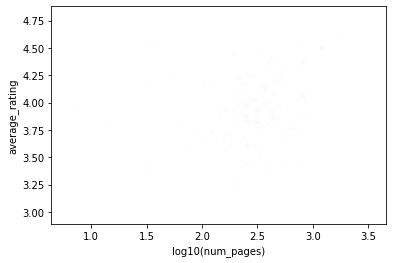

In [7]:
books_df = processing.answer_rq_8_1(data_path)
books_df.plot.scatter(y='average_rating', x='log10(num_pages)', alpha = 0.002)


The scatterplot shows rather the opposite. Starting from 10^2.5 pages the average ratings are increasing with increasing number of pages and concentrating around 4.5.

Considering only the books with up to 10^2.5 pages, we see that the variance in the average rating increases and the mean seems to decrease.

#### ad 2.
Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

After removing the books where no language is given we group the books by english or non-english. When done this we perform a Kolmogorov-Smirnov-Test to compare the distribution of their average-rate (:=average-ratings).

In [8]:
languages_set = processing.get_languages(data_path)

We divided them into english, non-english and no-languages. The first and the latter we defined explicitly the one in the middle is defined to be the rest.

In [9]:
english_languages = {'en',
 'en-CA',
 'en-GB',
 'en-IN',
 'en-US',
 'eng',
 'enm'}
no_languages = {'',
 '--',
 'Select...',}

In [10]:
books_df, grouped_df = processing.get_eng_vs_non_eng(data_path, no_languages)
grouped_df

The process lasted approximately 0.11 seconds.


,average_rating
en,
False,"[3.74, 3.93, 3.86, 3.99, 3.9, 3.28000000000000..."
True,"[4.5, 4.48, 4.43, 4.57, 4.5600000000000005, 4...."


In [11]:
# now performing the kolmogorov-smirnov-test to check equality of the two distributions:
pval = processing.perform_ks2s_test_and_interprete(grouped_df.loc[False,'average_rating'], grouped_df.loc[True,'average_rating'], alpha=0.05)

assuming a test-level of alpha = 0.05
Since the pvalue is approximately 0.331274 , i.e. strictly greater than alpha, 
there's no significance for a difference in the analyzed distributions.


#### ad 3.
About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

Next we provide some (helpful) statistics and a boxplot. First we want to describe a boxplot as it is created by the method we use:

"The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box to the farthest data point lying within 1.5x the inter-quartile range (IQR) from the box. Flier points are those past the end of the whiskers."

source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

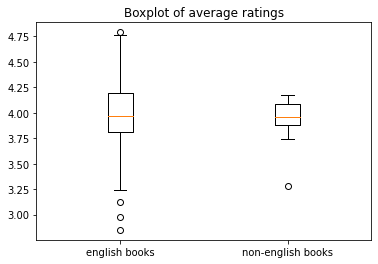

,ratings_count,average_rating
count,2.180000e+02,218.000000
mean,2.423474e+05,3.983945
std,6.846628e+05,0.319393
min,5.000000e+00,2.850000
25%,9.052500e+02,3.812500
50%,9.984000e+03,3.970000
75%,1.243205e+05,4.177500
max,7.377351e+06,4.790000


In [12]:
from matplotlib import pyplot as plt
plt.title("Boxplot of average ratings")
plt.boxplot([grouped_df.loc[True,'average_rating'], grouped_df.loc[False,'average_rating']], labels =["english books","non-english books"])
plt.show()
books_df.describe()

Next we see the **mode** of ratings_count, average_rating, language and en."
The mode is probably only useful for "langauge" and "en" since these are non-metric, even categorical.


In [13]:
books_df.mode()

,ratings_count,average_rating,language,en
0,413477,3.83,eng,True
1,687398,NaN,NaN,NaN


#### ad 4.
It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

The process lasted approximately 0.09 seconds.


c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:615: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


We consider the rooted dataset since here the impact of outliers is lowered.
slope is 1.6798652433613914
intercept is 5053.626203043771
R-squared-Coefficient is 0.6727881114179519
Since the slope is significantly greater than zero 
we see that the more fans an author has the more text_reviews he has. 
Hence we can refuse the stated claim that fans of authors with more fans would be lazier. 
The R-squared-Coefficient is with approximately 0.67
is at least half. Hence the model does explain some of the seen variance.


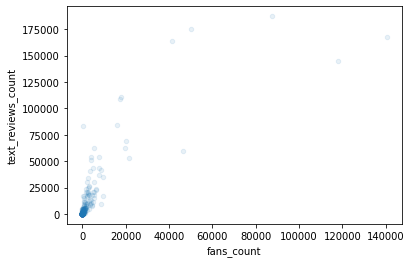

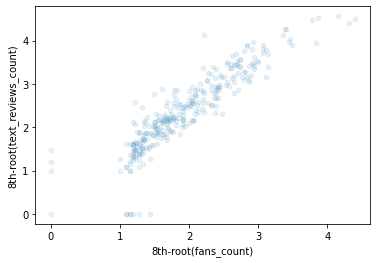

In [14]:
books_df = None # to free some memory
authors_df = processing.get_data_on_lazyness(data_path)
authors_df.plot.scatter(x='fans_count', y='text_reviews_count', alpha = 0.1)
authors_df.plot.scatter(x='8th-root(fans_count)', y='8th-root(text_reviews_count)', alpha = 0.1)
model, score = processing.perform_lin_regression(authors_df, 'fans_count', 'text_reviews_count'  )
print('We consider the rooted dataset since here the impact of outliers is lowered.')
processing.interprete_lin_regression(model,score)

#### ad 5.
Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

##### Hypothesis testing:
The alternative is (if possible) the claim we want to confirm. However sometimes it is not possible to choose what we want to claim as the alternative. For example if we are testing "theta $=$ 0" vs. "theta $\neq$ 0" often it is only possible to choose "theta==0" as the hypothesis.

Whenever we test hypotheses we need to determine a significance level, often called alpha, which determines the highest acceptable error of 1st kind, to determine if there's evidence for the alternative or not.

###### (non-)parametric tests:
Parametric tests assume that the distribution of data is known up to a paramter $\theta \in \mathbb{R}^d$ for some $d \in \mathbb{N}$. Given that we know the distribution (with high probability) we should use these since they are more appropriate for our data.

However if we don't know the distribution we should go for nonparametric tests, since these do not make assumptions on the distribution of the data. With less requirements for a tests one naturally gets less out of it, but few is better than nothing or something wrong.

###### Some useful tests are...
- fisher and chi-square for independence of binary resp. categorical variables
- kolmogorov-smirnov or mann-whitney-u to compare two unknown distributions
- regression tests
  - (multiple) linear regression
  - logistic regression
  - polynomial regression
